In [9]:
import osmnx as ox

G_addr = ox.graph_from_address("Av. Zoquipan 107, Zapopan, Mexico", dist=1000, network_type="walk")

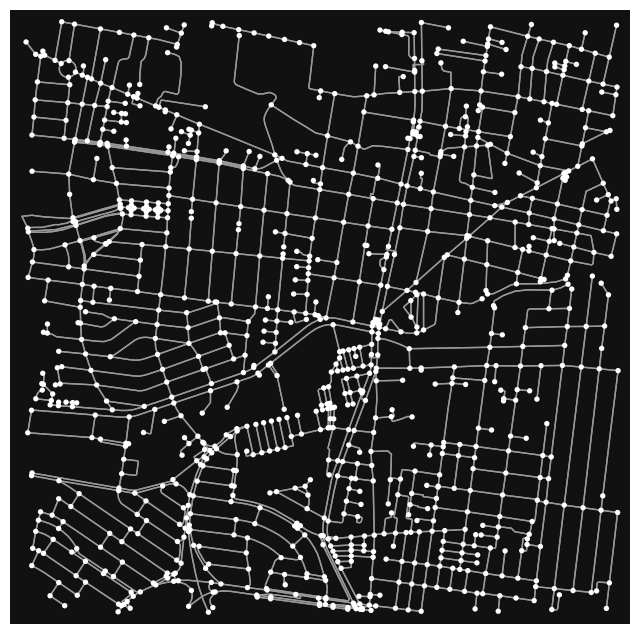

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
ox.plot_graph(G_addr)

Removed 0 degree-1 nodes.


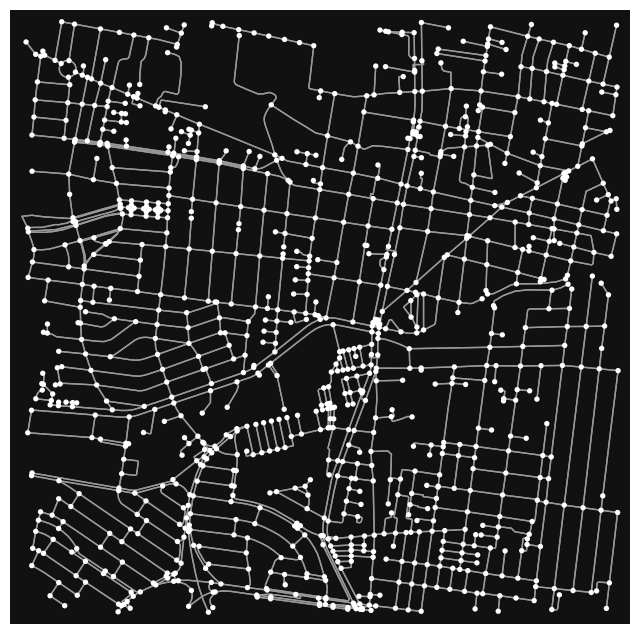

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
# remove all nodes with degree 1 iteratively (prune dead-ends)
to_remove = [n for n, deg in dict(G_addr.degree()).items() if deg == 1]
removed_total = 0
while to_remove:
    removed_total += len(to_remove)
    G_addr.remove_nodes_from(to_remove)
    to_remove = [n for n, deg in dict(G_addr.degree()).items() if deg == 1]

print(f"Removed {removed_total} degree-1 nodes.")
ox.plot_graph(G_addr)

In [13]:
# show the first node and its attributes
first_node = next(iter(G_addr.nodes()))
print("First node id:", first_node)

attrs = G_addr.nodes[first_node]
print("Attributes:")
for k, v in attrs.items():
    print(f"  {k}: {v}")

First node id: 321258572
Attributes:
  y: 20.712989
  x: -103.3630726
  street_count: 3


In [15]:
# outgoing neighbors (successors)
out_neighbors = list(G_addr.successors(first_node))
print("Outgoing neighbors:", out_neighbors)

# incoming neighbors (predecessors)
in_neighbors = list(G_addr.predecessors(first_node))
print("Incoming neighbors:", in_neighbors)

# all unique neighbors (ignore direction)
all_neighbors = list(set(out_neighbors) | set(in_neighbors))
print("All neighbors:", all_neighbors)

Outgoing neighbors: [3067211296, 7702600323, 3067211295]
Incoming neighbors: [3067211295, 3067211296, 7702600323]
All neighbors: [3067211296, 7702600323, 3067211295]


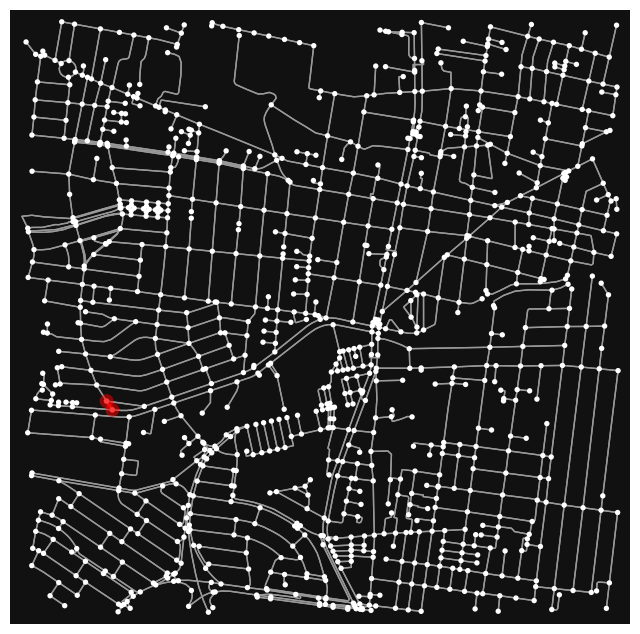

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
route = [first_node, out_neighbors[0]]  # example route

ox.plot_graph_route(G_addr, route)